In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

Renaming WA_Fn-UseC_-HR-Employee-Attrition to emp_attrition.csv

In [67]:
col_names = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
dt = pd.read_csv("emp_attrition2.csv", header=None, names=col_names)
print(dt)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   

Text(0, 0.5, 'Number')

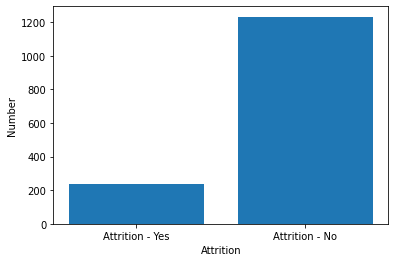

In [68]:
attrition = dt.groupby('Attrition').size()
a_Y = attrition['Yes']
a_N = attrition['No']

x = ["Attrition - Yes","Attrition - No"]
y = [att_Y,att_N]

plt.bar(x,y)
plt.xlabel("Attrition")
plt.ylabel("Number")

In [69]:
d = pd.get_dummies(dt)
dt = pd.concat([dt,d], axis=1)
x=[dt.Attrition_Yes]

In [70]:
# Categorical 
dt = dt.drop(['Attrition_No','Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18'],axis=1)

In [71]:
X = dt.drop(['Attrition_Yes'],axis=1)
Y = dt['Attrition_Yes']
print(Y)

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=0)

In [73]:
# Using gini
model = DecisionTreeClassifier(min_samples_leaf = 100, criterion = 'gini')
model = model.fit(x_train,y_train)

accuracy = model.score(x_test,y_test)
print(accuracy)

pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

0.8231292517006803
[[121   0]
 [ 26   0]]
